In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

In [2]:
# viRF Data
equity_vi = pd.read_csv("../Seedrs/Data/seedrs_variable_importance.csv")
lending_vi = pd.read_csv("../Prosper/Data/prosper_variable_importance.csv")
charity_vi = pd.read_csv("../DonorsChoose/Data/dc_variable_importance.csv")
# piRF Data
equity_pi = pd.read_csv("../Seedrs/Data/seedrs_permutation_importance.csv")
lending_pi = pd.read_csv("../Prosper/Data/prosper_permutation_importance.csv")
charity_pi = pd.read_csv("../DonorsChoose/Data/dc_permutation_importance.csv")

In [3]:
equity_pi.head()

,NumContributors,CovInterEventTime,CovContributionAmount,TimeToFirstContribution (sec),Duration (days),PassedQuiz,EquityPercent,PreMoneyValuation,NumEntrepreneurs,SelfCertification,EisComplinat,SeisCompliant,Slug,AmountRequested
0,0.289272,0.042146,0.053640,-0.013410,0.001916,0.0,-0.005747,0.015326,-0.009579,0.0,0.001916,0.011494,0.005747,0.026820
1,0.227969,0.047893,0.080460,0.011494,-0.005747,0.0,0.013410,0.013410,0.009579,0.0,-0.001916,-0.001916,0.013410,0.030651
2,0.201149,0.082375,0.021073,0.003831,0.003831,0.0,0.000000,-0.001916,0.005747,0.0,-0.001916,0.000000,-0.003831,0.009579
3,0.189655,0.053640,0.109195,0.000000,0.015326,0.0,0.013410,0.000000,0.003831,0.0,-0.001916,-0.001916,0.001916,0.013410
4,0.227969,0.042146,0.047893,0.013410,-0.001916,0.0,0.005747,0.003831,-0.005747,0.0,0.009579,-0.009579,-0.001916,0.022989


In [4]:
charity_vi.columns

Index([u'Duration (days)', u'AmountRequested',
       u'TimeToFirstContribution (sec)', u'CovContributionAmount',
       u'NumContributors', u'CovInterEventTime', u'primary_focus_area',
       u'resource_type', u'grade_level', u'school_metro', u'teacher_prefix'],
      dtype='object')

In [5]:
# matplotlib.rc('text', usetex=True)
# matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [58]:
# piRF Labels
equity_pi_labels = ["$Appeal$", "$Momentum$", "$Variation$", "Amount", "Equity", "$Engagement$", "Valuation", 
                    "$Latency$", "Entrepreneurs", "Slug", "SEIS Compliant", "EIS Compliant", "Passed Quiz", "Self-Certification"]
equity_pi_cols = ['NumContributors', 'CovInterEventTime', 'CovContributionAmount', 'AmountRequested', 'EquityPercent',
                  'Duration (days)', 'PreMoneyValuation', 'TimeToFirstContribution (sec)', 'NumEntrepreneurs', 'Slug', 
                  'SeisCompliant', 'EisComplinat', 'PassedQuiz', 'SelfCertification']

lending_pi_labels = ["Prosper Score", "$Appeal$", "$Engagement$", "$Variation$", "Loan Payment", "$Momentum$", "Amount", 
                     "$Latency$", "Interest Rate", "Credit Grade", "Debt Ratio", "Homeownership"]
lending_pi_cols = ['ProsperScore', 'NumContributors', 'Duration (days)', 'CovContributionAmount','MonthlyLoanPayment', 
                   'CovInterEventTime',  'AmountRequested', 'TimeToFirstContribution (sec)', 'BorrowerRate',  'CreditGrade',   
                   'DebtToIncomeRatio', 'IsBorrowerHomeowner']

charity_pi_labels = ["$Engagement$", "$Appeal$", "$Momentum$", "$Variation$", "Amount", "Grade Level", 
                     "Resource Type", "Gender", "School Metro", "Primary Area", "$Latency$"]
charity_pi_cols = ['Duration (days)', 'NumContributors', 'CovInterEventTime', 'CovContributionAmount', 'AmountRequested', 
                   'grade_level','resource_type', 'teacher_prefix', 'school_metro', 'primary_focus_area', 'TimeToFirstContribution (sec)', ]

In [59]:
red_square = dict(markerfacecolor='w', marker='o')
medianprops = dict(linestyle='-', linewidth=1, color='firebrick')

## piRF

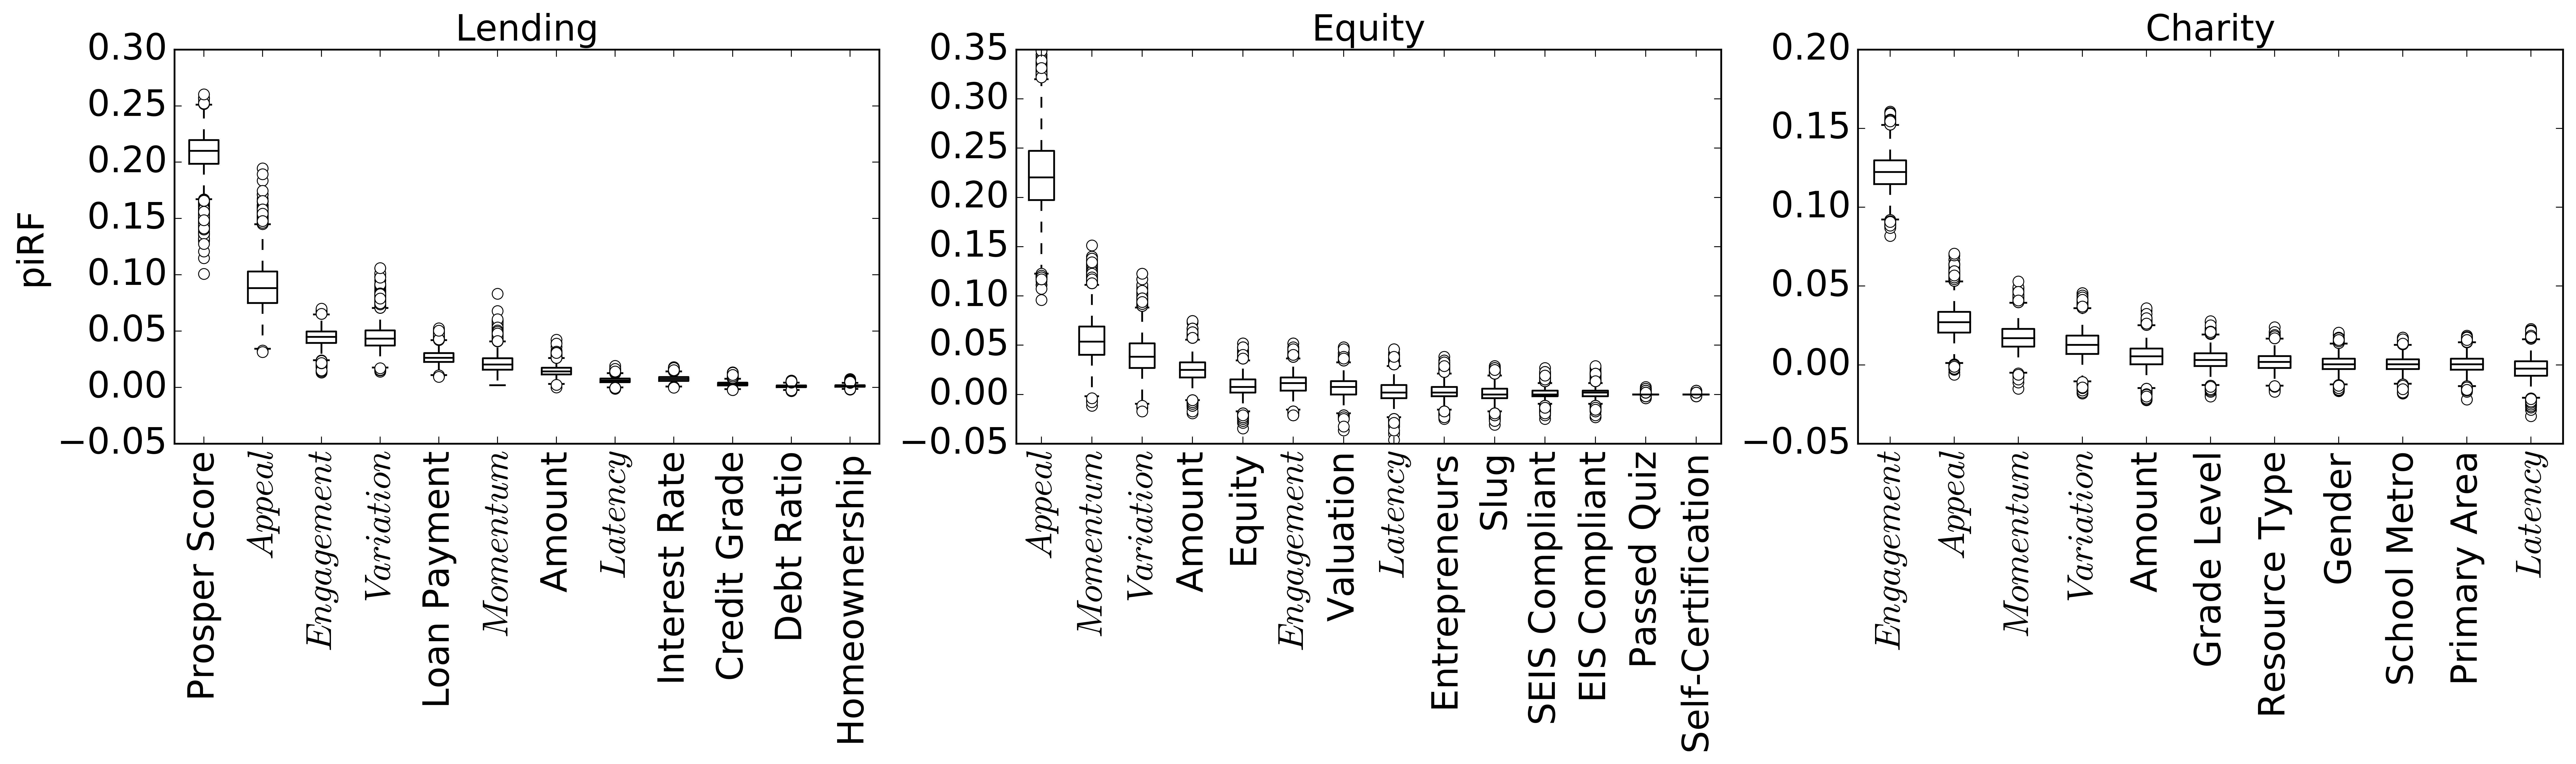

In [61]:
my_dpi = 600
fig, (ax1, ax2,ax3)  = plt.subplots(1,3, figsize=(20,6), dpi=my_dpi, sharey=False)
s = 20

lending_pi[lending_pi_cols].plot.box(ax=ax1, rot='vertical', color='k', fontsize=s, flierprops=red_square, medianprops=medianprops, label="Lending")
equity_pi[equity_pi_cols].plot.box( ax=ax2, rot='vertical', color='k', fontsize=s, flierprops=red_square, medianprops=medianprops, title="Crowd Equity", legend=True)
charity_pi[charity_pi_cols].plot.box(ax=ax3, rot='vertical', color='k', fontsize=s, flierprops=red_square, medianprops=medianprops, label="Charity")

ax1.set_xticklabels(lending_pi_labels)
ax2.set_xticklabels(equity_pi_labels)
ax3.set_xticklabels(charity_pi_labels)

ax1.set_title("Lending", fontsize=s)
ax2.set_title("Equity", fontsize=s)
ax3.set_title("Charity", fontsize=s)

ax1.set_ylabel("piRF", fontsize=s)

plt.tight_layout()
plt.show()

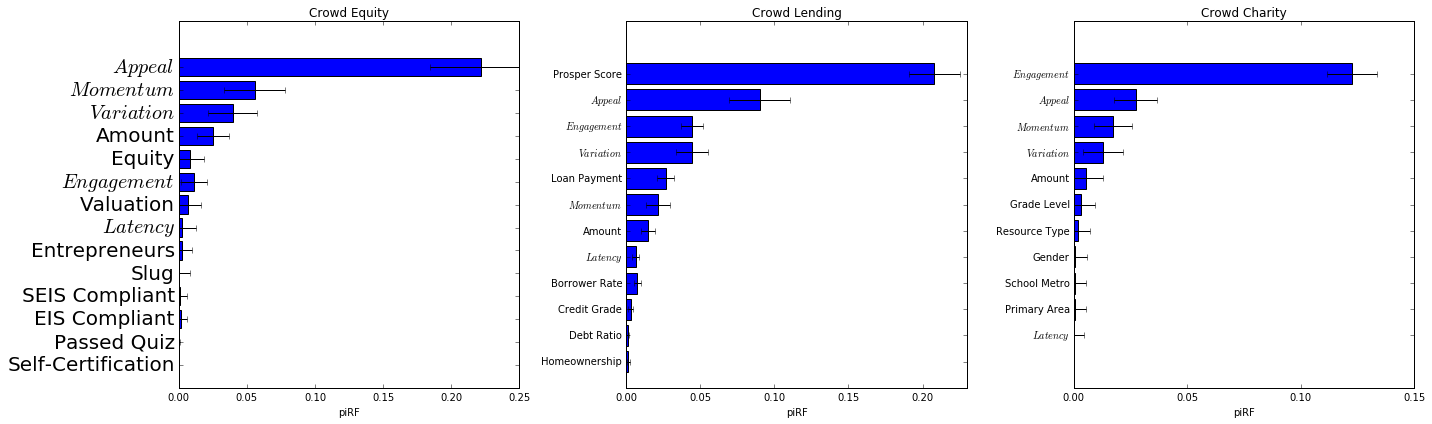

In [42]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6))
s = 20
y_pos = np.arange(len(equity_pi.columns))
ax1.barh(y_pos, equity_pi[equity_pi_cols].mean(), xerr=equity_pi[equity_pi_cols].std(), align='center')
ax1.set_xticks(np.arange(0, 1, .05))
ax1.set_xlim(0,.25)
ax1.set_yticks(y_pos)
ax1.set_yticklabels(equity_pi_labels, fontsize=s)
ax1.invert_yaxis()
ax1.set_xlabel('piRF')
ax1.set_title('Crowd Equity')

y_pos = np.arange(len(lending_pi.columns))
ax2.barh(y_pos, lending_pi[lending_pi_cols].mean(), xerr=lending_pi[lending_pi_cols].std(), align='center')
ax2.set_xticks(np.arange(0, 1, .05))
# ax2.set_xticklabels(fontsize=s)
ax2.set_xlim(0,.23)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(lending_pi_labels)
ax2.invert_yaxis()
ax2.set_xlabel('piRF')
ax2.set_title('Crowd Lending')

y_pos = np.arange(len(charity_pi.columns))
ax3.barh(y_pos, charity_pi[charity_pi_cols].mean(), xerr=charity_pi[charity_pi_cols].std(), align='center')
ax3.set_xticks(np.arange(0, 1, .05))
# ax3.set_xticklabels(np.arange(0, 0.15, .02), fontsize=s)
ax3.set_xlim(0,.15)
ax3.set_yticks(y_pos)
ax3.set_yticklabels(charity_pi_labels)
ax3.invert_yaxis()
ax3.set_xlabel('piRF')
ax3.set_title('Crowd Charity')

plt.tight_layout()
plt.show()

In [9]:
print np.true_divide(sum(equity_pi.mean()[:5]), sum(equity_pi.mean()))
print np.true_divide(sum(lending_pi.mean()[:5]), sum(lending_pi.mean()))
print np.true_divide(sum(charity_pi.mean()[:5]), sum(charity_pi.mean()))

0.8782424369414558
0.44038664251124754
0.937655926427185
